In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# where is the data?
data_dir = '/Volumes/ExtDrive/Downloads/tiny-imagenet-200/train/'

In [3]:
# utilities for image gather and naming
def gather_images_from_dir_recursive(input_dir, image_extensions=['*.bmp', '*.jpg', '*.png', '*.JPEG']):
    image_list = []
    for image_extension in image_extensions:
        image_list.extend(glob.glob(os.path.join(input_dir, '**', image_extension), recursive=True))
    return image_list

def get_file_name(path):
    file_name_with_ext = path.rsplit('\\', 1)[1]
    file_name, file_extension = os.path.splitext(file_name_with_ext)
    return file_name

In [4]:
#gather images
image_paths = gather_images_from_dir_recursive(data_dir)
print(f'Found {len(image_paths)} images')

Found 86239 images


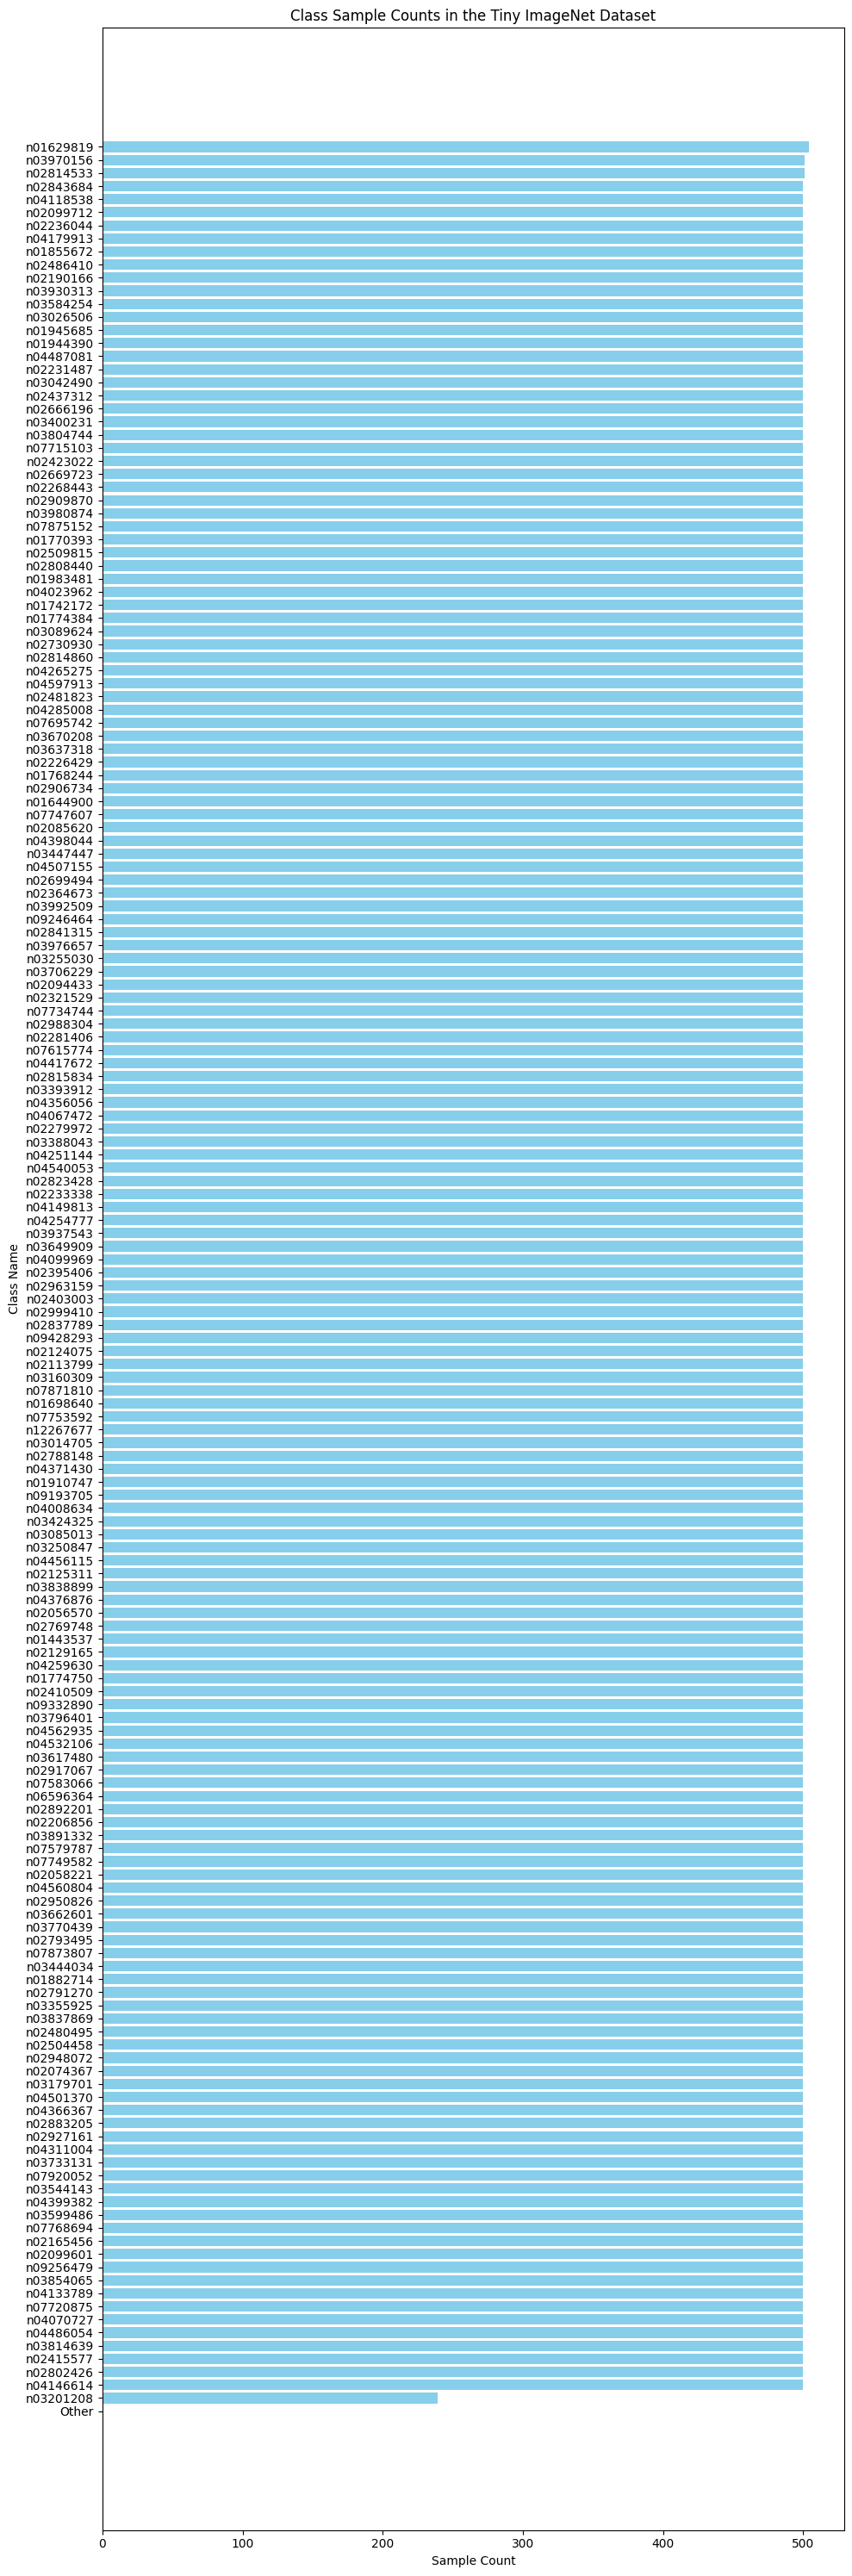

In [11]:
tiny_imagenet_dir = data_dir

# Initialize a dictionary to store class sample counts.
class_counts = {}

# Iterate through the subdirectories (one per class) in the dataset directory.
for class_folder in os.listdir(tiny_imagenet_dir):
    class_path = os.path.join(tiny_imagenet_dir, class_folder, 'images')
    
    if os.path.isdir(class_path):
        # Count the number of image files in the "images" subdirectory.
        num_samples = len(os.listdir(class_path))
        
        # Store the class name and sample count in the dictionary.
        class_counts[class_folder] = num_samples

# Convert the dictionary to a Pandas DataFrame for easier analysis and visualization.
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Sample Count'])

# Sort the classes by sample count in descending order.
class_counts_df = class_counts_df.sort_values(by='Sample Count', ascending=False)

# Group classes with fewer than a threshold number of samples into "Other" category.
threshold = 100  # You can adjust this threshold as needed.
if len(class_counts_df) > 20:
    small_classes = class_counts_df[class_counts_df['Sample Count'] < threshold]
    other_count = small_classes['Sample Count'].sum()
    class_counts_df = class_counts_df[class_counts_df['Sample Count'] >= threshold]
    class_counts_df.loc['Other'] = other_count

# Create a horizontal bar chart to visualize the class sample counts.
plt.figure(figsize=(10, 30))
plt.barh(class_counts_df.index, class_counts_df['Sample Count'], color='skyblue')
plt.xlabel('Sample Count')
plt.ylabel('Class Name')
plt.title('Class Sample Counts in the Tiny ImageNet Dataset')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest classes at the top

# Display the bar chart.
plt.tight_layout()
plt.show()